In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):

    fig, ax = plt.subplots(figsize=(5,5),dpi=100)

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",fontsize=17)
    cbar.ax.tick_params(labelsize=17)
    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels, weight='bold', fontsize=17)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False, labelsize=12)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):


    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw, fontsize=17)
            texts.append(text)
    return texts

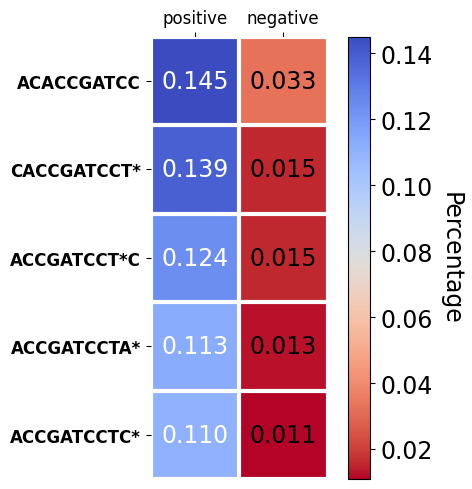

In [24]:
df = pd.read_csv('table1-1.csv')
df.sort_values('per_in_pos',ascending=False,inplace=True)
motif = list(df['motif'])
classes = ["positive", "negative"]
data = df[['per_in_pos','per_in_neg']].values
im, cbar = heatmap(data, motif, classes,
                   cmap="coolwarm_r", cbarlabel="Percentage")
texts = annotate_heatmap(im, valfmt="{x:.3f}")

plt.tight_layout()
plt.show()

In [116]:
def heatmap_dff(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):

    fig, ax = plt.subplots(figsize=(5,5),dpi=100)

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
#     cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw,aspect=20)
#     cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom",fontsize=17)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb = fig.colorbar(im, cax=cax)

    # Add a vertical title for the colorbar
    cb.ax.set_ylabel(cbarlabel,rotation=-90, va="bottom",fontsize=17)

    # Fit the colorbar with the height of the heatmap
    cax.set_aspect('auto')

    # Show all ticks and label them with the respective list entries.
#     ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
#     ax.set_yticks(np.arange(data.shape[0]), labels=row_labels, weight='bold', fontsize=10)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False, labelsize=12)
    

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.axis('off')
    return im, cbar


def annotate_heatmap_dff(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black","white"),
                     threshold=None, **textkw):


    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) >= threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw, fontsize=14)
            texts.append(text)
    return texts

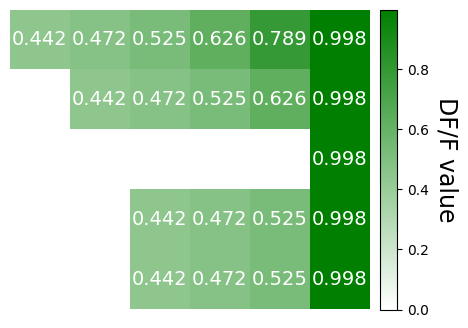

In [117]:
dff = {}
for motif in list(df_t1['motif']):
    dff_values = list(df_filtered[df_filtered['sequence'].str.contains(motif)]['1195.3805'])  
    dff[motif]= sorted(dff_values)
max_len = len(max(dff.values(), key=len))
for key,value in dff.items():
    dff[key] = [0]*(max_len-len(value)) + dff[key]
motif = list(dff.keys())
max_len = len(max(dff.values(), key=len))
for key,value in dff.items():
    dff[key] = [0]*(max_len-len(value)) + dff[key]
classes = [n_class for n_class in range(1,max_len+1)]
data = np.array(list(dff.values()))
im, cbar = heatmap_dff(data, motif, classes,
               cmap=LinearSegmentedColormap.from_list('rg',["w", "g"], N=256) 
                       , cbarlabel="DF/F value")
texts = annotate_heatmap_dff(im, valfmt="{x:.3f}", threshold=0)


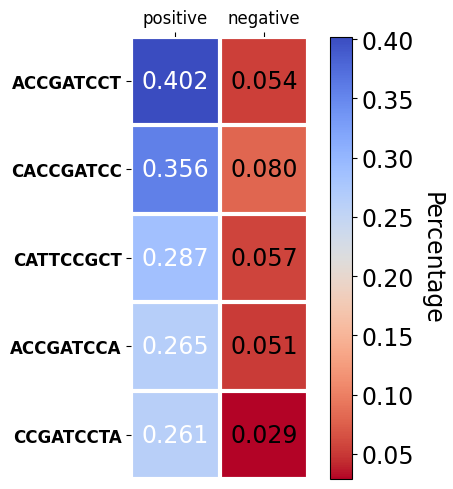

In [71]:
df = pd.read_csv('table1-2.csv')
df.sort_values('per_in_pos',ascending=False,inplace=True)
motif = list(df['motif'])
classes = ["positive", "negative"]
data = df[['per_in_pos','per_in_neg']].values
# fig, ax = plt.subplots(figsize=(5,5),dpi=100)
im, cbar = heatmap(data, motif, classes,
                   cmap="coolwarm_r", cbarlabel="Percentage")
texts = annotate_heatmap(im, valfmt="{x:.3f}")

plt.tight_layout()
plt.show()

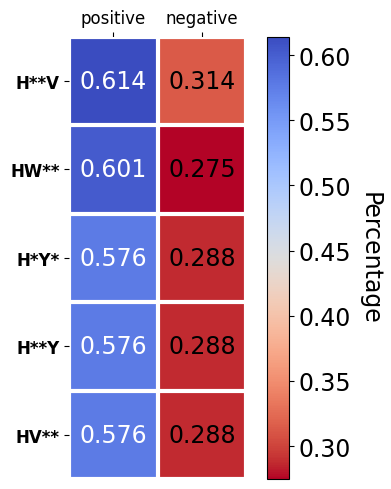

In [72]:
df = pd.read_csv('table1-3.csv')
df.sort_values('per_in_pos',ascending=False,inplace=True)
motif = list(df['motif'])
classes = ["positive", "negative"]
data = df[['per_in_pos','per_in_neg']].values
im, cbar = heatmap(data, motif, classes,
                   cmap="coolwarm_r", cbarlabel="Percentage")
texts = annotate_heatmap(im, valfmt="{x:.3f}")

plt.tight_layout()
plt.show()

In [77]:
df_t1

,motif,occ_in_pos,occ_in_neg,per_in_pos,per_in_neg,difference
0,CACCGATCCT*,792,34,0.1387,0.0155,0.1232
1,ACACCGATCC,828,72,0.1450,0.0328,0.1122
2,ACCGATCCT*C,708,34,0.1240,0.0155,0.1085
3,ACCGATCCTA*,645,28,0.1130,0.0128,0.1002
4,ACCGATCCTC*,628,24,0.1100,0.0109,0.0991


In [78]:

dff

{'CACCGATCCT*': [0.4424561242304512,
  0.4721312191499586,
  0.5253926375505303,
  0.62584406779661,
  0.78867418742321,
  0.9977492262965388],
 'ACACCGATCC': [0.4424561242304512,
  0.4721312191499586,
  0.5253926375505303,
  0.62584406779661,
  0.9977492262965388],
 'ACCGATCCT*C': [0.9977492262965388],
 'ACCGATCCTA*': [0.4424561242304512,
  0.4721312191499586,
  0.5253926375505303,
  0.9977492262965388],
 'ACCGATCCTC*': [0.4424561242304512,
  0.4721312191499586,
  0.5253926375505303,
  0.9977492262965388]}

In [79]:

dff

{'CACCGATCCT*': [0.4424561242304512,
  0.4721312191499586,
  0.5253926375505303,
  0.62584406779661,
  0.78867418742321,
  0.9977492262965388],
 'ACACCGATCC': [0,
  0.4424561242304512,
  0.4721312191499586,
  0.5253926375505303,
  0.62584406779661,
  0.9977492262965388],
 'ACCGATCCT*C': [0, 0, 0, 0, 0, 0.9977492262965388],
 'ACCGATCCTA*': [0,
  0,
  0.4424561242304512,
  0.4721312191499586,
  0.5253926375505303,
  0.9977492262965388],
 'ACCGATCCTC*': [0,
  0,
  0.4424561242304512,
  0.4721312191499586,
  0.5253926375505303,
  0.9977492262965388]}

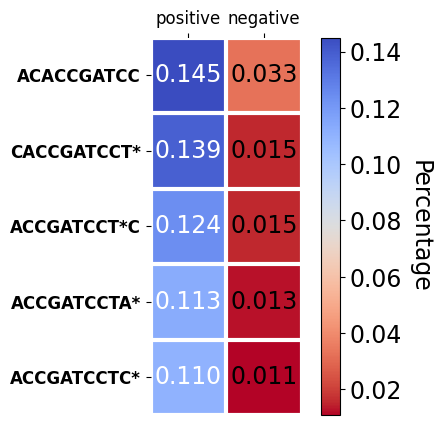

In [80]:
df = pd.read_csv('table1-1.csv')
df.sort_values('per_in_pos',ascending=False,inplace=True)
motif = list(df['motif'])
classes = ["positive", "negative"]
data = df[['per_in_pos','per_in_neg']].values
im, cbar = heatmap(data, motif, classes,
                   cmap="coolwarm_r", cbarlabel="Percentage")
texts = annotate_heatmap(im, valfmt="{x:.3f}")